In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline 

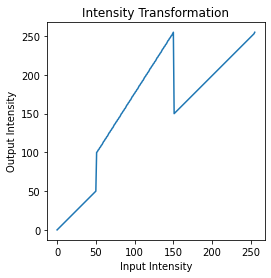

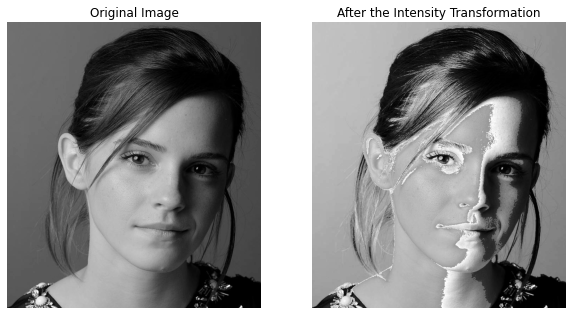

In [7]:
Img1 = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert Img1 is not None

inp1 = np.linspace(0,50,51)
inp2 = np.linspace(100,255,100)
inp3 = np.linspace(150,255,105)

Out_int = np.concatenate((inp1,inp2,inp3),axis=0).astype(np.uint8)
fig1, ax1 = plt.subplots()
ax1.plot(Out_int)
ax1.title.set_text("Intensity Transformation")
ax1.set_xlabel('Input Intensity')
ax1.set_ylabel('Output Intensity')
ax1.set_aspect('equal')
assert len(Out_int) == 256

Out_Img1 = cv.LUT(Img1, Out_int)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[0].imshow(Img1 , cmap='gray')
ax[1].axis('off')
ax[1].title.set_text("After the Intensity Transformation")
ax[1].imshow(Out_Img1 , cmap='gray')

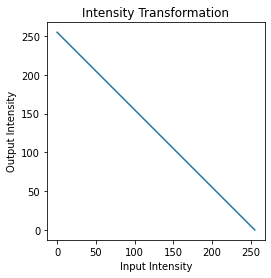

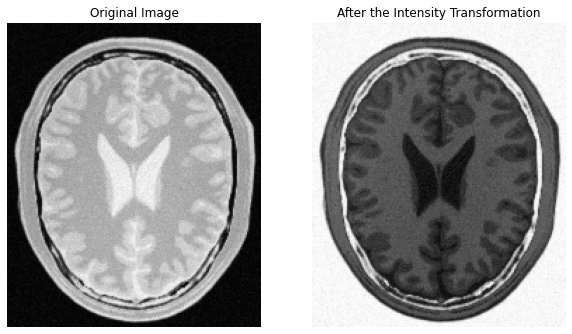

In [3]:
Img2 = cv.imread(r"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert Img2 is not None

inp1 = np.linspace(255,0,256)

Out_int = inp1.astype(np.uint8)
fig1, ax1 = plt.subplots()
ax1.plot(Out_int)
ax1.title.set_text("Intensity Transformation")
ax1.set_xlabel('Input Intensity')
ax1.set_ylabel('Output Intensity')
ax1.set_aspect('equal')
assert len(Out_int) == 256

Out_Img2 = cv.LUT(Img2, Out_int)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[0].imshow(Img2 , cmap='gray')
ax[1].axis('off')
ax[1].title.set_text("After the Intensity Transformation")
ax[1].imshow(Out_Img2 , cmap='gray')

In [10]:
Img3 = cv.imread(r"highlights_and_shadows.jpg")
assert Img3 is not None

gamma = 0.5
Img3 = cv.cvtColor(Img3, cv.COLOR_BGR2Lab)
L,a,b=cv.split(Img3)

Gamma_Trans = np.array([(p/100)**gamma*100 for p in range(0,101)]).astype(np.int8)
L = Gamma_Trans[L]
Trans_Img3 = np.concatenate(L,a,b,axis=2)

Out_Img3 = cv.cvtColor(Trans_Img3, cv.COLOR_Lab2BGR).astype("uint8")

Img3 = cv.cvtColor(Img3, cv.COLOR_BGR2RGB).astype("uint8")
Out_Img3 = cv.cvtColor(Out_Img3, cv.COLOR_BGR2RGB).astype("uint8")

fig, ax = plt.subplots()
ax.plot(Gamma_Trans)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[0].imshow(Img3)
ax[1].axis('off')
ax[1].title.set_text("After the Intensity Transformation")
ax[1].imshow(Out_Img3)

IndexError: index 101 is out of bounds for axis 0 with size 101